### Create script

Para esta etapa se hace un procesamiento previo de extraccion de datos donde se elije solo la parte del Pacifico intertropical como dominio y tambien se selecciona las variables: "surface_downward_eastward_stress" y "surface_downward_northward_stress".

In [65]:
import os
import sys
import pandas as pd
sys.path.append("/home/brayan/mnsun/")
from utils import check_dir

# BASE             = "wget ftp://ftp.ifremer.fr/ifremer/cersat/products/gridded/MWF/L3/ASCAT/Daily/Netcdf/{year}/{month}/{day}/{year}{day}00* && bzip2 -d {month}/{day}/{year}{day}00*.bz2"
OUTPUT_DIR       = "/home/brayan/DATA/Modelo-Multimodal-de-Ondas/"
init_date_update = "2007-03-21"
end_date_update  = "2007-03-31"

In [66]:
def dates_download(init_, end_):
    
    """
    Esta funcion permite listar las fechas que seran utilizadas para la descarga.
    
    Input: 
            init_: fecha de inicio [string]
            end_ : fecha final [string]
    Output: 
            : fechas listadas [list]    
    """
    
    if init_ != end_:
        dates_ = pd.date_range(init_, end_, freq="D")
    else:
        dates_ = pd.date_range(init_, periods=1, freq="D")
        
    return [str(i)[:10] for i in dates_.values]    

In [76]:
def build_sentences(list_dates_, output_):
    """
    Fincion que permite crear las sentencias de descarga y descompresion en un archivo txt a partir del url fuente
    """
    base_ = "wget -cO - ftp://ftp.ifremer.fr/ifremer/cersat/products/gridded/MWF/L3/ASCAT/Daily/Netcdf/{year}/{month}/{day}/{year}{month}{day}00* > {output}/{year}/{year}{month}{day}00_daily-ifremer-L3-MWF-GLO.nc.bz2 && bzip2 -d ./{year}/{year}{month}{day}00*.bz2"
    #base_ = "wget ftp://ftp.ifremer.fr/ifremer/cersat/products/gridded/MWF/L3/ASCAT/Daily/Netcdf/{year}/{month}/{day}/{year}{month}{day}00* && bzip2 -d ./{year}/{year}{day}00*.bz2"
    with open(output_ + "download.txt", "w") as f:        
        for date_ in list_dates_:
            print(date_)
            check_dir(output_ +date_.split("-")[0]+"/")
            f.write(base_.format(year=date_.split("-")[0], month=date_.split("-")[1], day=date_.split("-")[-1], output = output_)+ "\n")

In [77]:
def main():
    OUTPUT_DIR       = "/home/brayan/DATA/Modelo-Multimodal-de-Ondas/raw_data/"
    init_date_update = "2007-03-21"
    end_date_update  = "2007-12-31"    
    build_sentences(dates_download(init_date_update, end_date_update) ,OUTPUT_DIR)

def __init__():
    
    OUTPUT_DIR       = "/home/brayan/DATA/Modelo-Multimodal-de-Ondas/"
    init_date_update = "2007-03-21"
    end_date_update  = "2007-12-31"
    print(dates_download(init_date_update, end_date_update))
    build_sentences(dates_download(init_date_update, end_date_update) ,OUTPUT_DIR)

In [78]:
if __name__ == "__main__":
    main()

2007-03-21
2007-03-22
2007-03-23
2007-03-24
2007-03-25
2007-03-26
2007-03-27
2007-03-28
2007-03-29
2007-03-30
2007-03-31
2007-04-01
2007-04-02
2007-04-03
2007-04-04
2007-04-05
2007-04-06
2007-04-07
2007-04-08
2007-04-09
2007-04-10
2007-04-11
2007-04-12
2007-04-13
2007-04-14
2007-04-15
2007-04-16
2007-04-17
2007-04-18
2007-04-19
2007-04-20
2007-04-21
2007-04-22
2007-04-23
2007-04-24
2007-04-25
2007-04-26
2007-04-27
2007-04-28
2007-04-29
2007-04-30
2007-05-01
2007-05-02
2007-05-03
2007-05-04
2007-05-05
2007-05-06
2007-05-07
2007-05-08
2007-05-09
2007-05-10
2007-05-11
2007-05-12
2007-05-13
2007-05-14
2007-05-15
2007-05-16
2007-05-17
2007-05-18
2007-05-19
2007-05-20
2007-05-21
2007-05-22
2007-05-23
2007-05-24
2007-05-25
2007-05-26
2007-05-27
2007-05-28
2007-05-29
2007-05-30
2007-05-31
2007-06-01
2007-06-02
2007-06-03
2007-06-04
2007-06-05
2007-06-06
2007-06-07
2007-06-08
2007-06-09
2007-06-10
2007-06-11
2007-06-12
2007-06-13
2007-06-14
2007-06-15
2007-06-16
2007-06-17
2007-06-18
2007-06-19

### Modify file

In [151]:
import os
#import sys
import xarray as xr
import glob
import numpy as np
import pandas as pd
#sys.path.append("/home/brayan/mnsun/")
#from utils import check_dir

In [82]:
def dates_download(init_, end_):
    
    """
    Esta funcion permite listar las fechas que seran utilizadas para la descarga.
    
    Input: 
            init_: fecha de inicio [string]
            end_ : fecha final [string]
    Output: 
            : fechas listadas [list]    
    """
    
    if init_ != end_:
        dates_ = pd.date_range(init_, end_, freq="D")
    else:
        dates_ = pd.date_range(init_, periods=1, freq="D")
        
    return [str(i)[:10] for i in dates_.values]  

In [195]:
def create_xarray(data_, dim1, dim2, dim3, dim1_name, dim2_name, dim3_name):
    """
    Se crea un xarray que tiene la siguiente estructura estandar:
    'time, latitud, longitud'
    
    Output: Informacion de data_Xarray en formato float_32 [Xarray] 
    """
    Array  =  xr.DataArray( np.float32(data_) ,
                            coords=[ dim1, dim2, dim3],
                            dims=[ dim1_name, dim2_name, dim3_name])     
    return Array

In [96]:
OUTPUT_DIR       = "/home/brayan/DATA/Modelo-Multimodal-de-Ondas/raw_data/"
init_date_update = "2007-03-21"
end_date_update  = "2007-03-24"   

In [154]:
list_ncs   = [glob.glob(OUTPUT_DIR+"TAU/"+date_.split("-")[0]+"/"+"".join(date_.split("-"))+"*")[0] for date_ in dates_download(init_date_update, end_date_update)]
list_dates = dates_download(init_date_update, end_date_update)

In [218]:
for file_nc, list_date in zip(list_ncs, list_dates):
    NC   = xr.open_dataset(file_nc)
    TAUX = getattr(NC,"surface_downward_eastward_stress")
    TAUY = getattr(NC,"surface_downward_northward_stress")
    date    = pd.date_range( list_date, periods=1, freq="D")
    lon_old = np.roll(TAUX.longitude.values, int(TAUX.shape[-1]/2))
    
    TAUX_32 = create_xarray( np.roll(TAUX.values.reshape(1,TAUX.latitude.shape[0], lon_old.shape[0]), int(TAUX.shape[-1]/2), axis=-1) ,
                             date, TAUX.latitude.values, np.where( lon_old < 0, lon_old + 360, lon_old), 
                             "time", "lat", "lon").sel(lat=slice(-30.5, 30.5), lon=slice(89.5, 300.5))
    TAUY_32 = create_xarray( np.roll(TAUY.values.reshape(1,TAUX.latitude.shape[0], lon_old.shape[0]), int(TAUX.shape[-1]/2), axis=-1) ,
                             date, TAUX.latitude.values, np.where( lon_old < 0, lon_old + 360, lon_old), 
                             "time", "lat", "lon").sel(lat=slice(-30.5, 30.5), lon=slice(89.5, 300.5))
    DATASET = xr.Dataset({"taux": TAUX_32, "tauy": TAUY_32})
    DATASET.to_netcdf(file_nc.split("00_")[0]+".nc")
    
    

In [215]:
list_ncs[0]

'/home/brayan/DATA/Modelo-Multimodal-de-Ondas/raw_data/TAU/2007/2007032100_daily-ifremer-L3-MWF-GLO.nc'

In [217]:
list_ncs[0].split("00_")

['/home/brayan/DATA/Modelo-Multimodal-de-Ondas/raw_data/TAU/2007/20070321',
 'daily-ifremer-L3-MWF-GLO.nc']

In [162]:
NC = xr.open_dataset(list_ncs[0])

In [163]:
TAUX = getattr(NC,"surface_downward_eastward_stress")

In [164]:
TAUY = getattr(NC,"surface_downward_northward_stress")

In [204]:
date    = pd.date_range(list_dates[0], periods=1, freq="D")
lon_old = np.roll(TAUX.longitude.values, int(TAUX.shape[-1]/2))

In [205]:
TAUX_32 = create_xarray( np.roll(TAUX.values.reshape(1,TAUX.latitude.shape[0], lon_old.shape[0]), int(TAUX.shape[-1]/2), axis=-1) ,
                         date, TAUX.latitude.values, np.where( lon_old < 0, lon_old + 360, lon_old), 
                         "time", "lat", "lon").sel(lat=slice(-30.5, 30.5), lon=slice(89.5, 300.5))

In [207]:
TAUY_32 = create_xarray( np.roll(TAUY.values.reshape(1,TAUX.latitude.shape[0], lon_old.shape[0]), int(TAUX.shape[-1]/2), axis=-1) ,
                         date, TAUX.latitude.values, np.where( lon_old < 0, lon_old + 360, lon_old), 
                         "time", "lat", "lon").sel(lat=slice(-30.5, 30.5), lon=slice(89.5, 300.5))

In [212]:
DATASET = xr.Dataset({"taux": TAUX_32, "tauy": TAUY_32})

In [213]:
DATASET.to_netcdf()

<xarray.Dataset>
Dimensions:  (lat: 244, lon: 844, time: 1)
Coordinates:
  * time     (time) datetime64[ns] 2007-03-21
  * lat      (lat) float32 -30.375 -30.125 -29.875 ... 29.875 30.125 30.375
  * lon      (lon) float32 89.625 89.875 90.125 ... 299.875 300.125 300.375
Data variables:
    taux     (time, lat, lon) float32 -0.0317 -0.0324 ... -0.112799995
    tauy     (time, lat, lon) float32 0.0356 0.035099998 ... -0.117199995

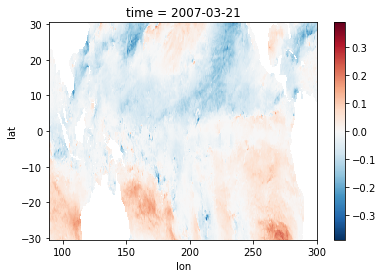

In [208]:
TAUY_32.plot()

In [173]:
TAUX.latitude.values.shape

(641,)

In [174]:
np.where( lon_old < 0, lon_old + 360, lon_old).shape

(1440,)

In [165]:
TAUX.shape

(1, 1, 641, 1440)

In [167]:
TAUX.latitude.values

array([-79.875, -79.625, -79.375, -79.125, -78.875, -78.625, -78.375,
       -78.125, -77.875, -77.625, -77.375, -77.125, -76.875, -76.625,
       -76.375, -76.125, -75.875, -75.625, -75.375, -75.125, -74.875,
       -74.625, -74.375, -74.125, -73.875, -73.625, -73.375, -73.125,
       -72.875, -72.625, -72.375, -72.125, -71.875, -71.625, -71.375,
       -71.125, -70.875, -70.625, -70.375, -70.125, -69.875, -69.625,
       -69.375, -69.125, -68.875, -68.625, -68.375, -68.125, -67.875,
       -67.625, -67.375, -67.125, -66.875, -66.625, -66.375, -66.125,
       -65.875, -65.625, -65.375, -65.125, -64.875, -64.625, -64.375,
       -64.125, -63.875, -63.625, -63.375, -63.125, -62.875, -62.625,
       -62.375, -62.125, -61.875, -61.625, -61.375, -61.125, -60.875,
       -60.625, -60.375, -60.125, -59.875, -59.625, -59.375, -59.125,
       -58.875, -58.625, -58.375, -58.125, -57.875, -57.625, -57.375,
       -57.125, -56.875, -56.625, -56.375, -56.125, -55.875, -55.625,
       -55.375, -55.

In [146]:
TAUX.shape[-1]/2

720.0

In [147]:
B = np.roll(TAUX.values,int(TAUX.shape[-1]/2), axis=-1)

In [141]:
B.shape

(1, 1, 641, 1440)

In [148]:
lon_old = np.roll(TAUX.longitude.values, int(TAUX.shape[-1]/2))

In [149]:
lon_old

array([ 0.125,  0.375,  0.625, ..., -0.625, -0.375, -0.125], dtype=float32)

In [150]:
np.where( lon_old < 0, lon_old + 360, lon_old)

array([1.25000e-01, 3.75000e-01, 6.25000e-01, ..., 3.59375e+02,
       3.59625e+02, 3.59875e+02], dtype=float32)

In [135]:
TAUX.shape

(1, 1, 641, 1440)

In [ ]:
TAUX_ = TAUX.

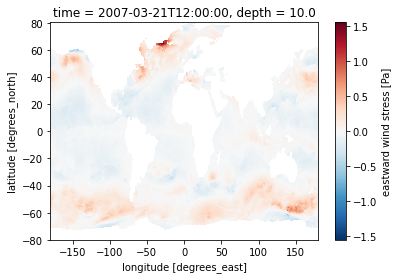

In [134]:
TAUX.plot()

In [ ]:
surface_downward_northward_stress

In [128]:
NC

<xarray.Dataset>
Dimensions:                            (depth: 1, latitude: 641, longitude: 1440, time: 1)
Coordinates:
  * time                               (time) datetime64[ns] 2007-03-21T12:00:00
  * depth                              (depth) float32 10.0
  * latitude                           (latitude) float32 -79.875 ... 80.125
  * longitude                          (longitude) float32 -179.875 ... 179.875
Data variables:
    wind_speed                         (time, depth, latitude, longitude) float32 ...
    eastward_wind                      (time, depth, latitude, longitude) float32 ...
    northward_wind                     (time, depth, latitude, longitude) float32 ...
    wind_stress                        (time, depth, latitude, longitude) float32 ...
    surface_downward_eastward_stress   (time, depth, latitude, longitude) float32 ...
    surface_downward_northward_stress  (time, depth, latitude, longitude) float32 ...
    land_ice_mask                      (time, depth, latitude, longitude) float32 ...
    wind_speed_rms                     (time, depth, latitude, longitude) float32 ...
    eastward_wind_rms                  (time, depth, latitude, longitude) float32 ...
    northward_wind_rms                 (time, depth, latitude, longitude) float32 ...
    sampling_length                    (time, depth, latitude, longitude) float32 ...
Attributes:
    Conventions:              CF-1.4
    title:                    Daily ASCAT global wind field
    references:               Bentamy, A.; Croize-Fillon, 2010: Gridded surfa...
    institution:              ifremer
    source:                   produced at 2011-05-31
    bulletin_date:            2011-05-31
    contact:                  fpaf@ifremer.fr, Abderrahim.Bentamy@ifremer.fr,...
    creation_date:            2011-05-31
    start_time:               12:00:00
    stop_time:                12:00:00
    start_date:               2007-03-21
    stop_date:                2007-03-21
    northernmost_latitude:    80.125
    southernmost_latitude:    -79.875
    easternmost_longitude:    179.875
    westernmost_longitude:    -179.875
    grid_resolution:          0.250 degree
    file_quality_index:       0.0
    time_resolution:          daily
    objective_method:         krigeage
    polar_sea_ice_mask_date:  2007-03-21
    creation_date_time:       20110531T232401

In [126]:
A.variables

Frozen({'time': <xarray.IndexVariable 'time' (time: 1)>
array(['2007-03-21T12:00:00.000000000'], dtype='datetime64[ns]')
Attributes:
    long_name:      time
    valid_min:      939852.0
    valid_max:      939852.0
    axis:           T
    standard_name:  time, 'depth': <xarray.IndexVariable 'depth' (depth: 1)>
array([10.], dtype=float32)
Attributes:
    long_name:      depth
    units:          m
    valid_min:      10.0
    valid_max:      10.0
    axis:           Z
    positive:       up
    standard_name:  depth, 'latitude': <xarray.IndexVariable 'latitude' (latitude: 641)>
array([-79.875, -79.625, -79.375, ...,  79.625,  79.875,  80.125],
      dtype=float32)
Attributes:
    long_name:      latitude
    units:          degrees_north
    valid_min:      -79.875
    valid_max:      80.125
    axis:           Y
    standard_name:  latitude, 'longitude': <xarray.IndexVariable 'longitude' (longitude: 1440)>
array([-179.875, -179.625, -179.375, ...,  179.375,  179.625,  179.875],
    

In [122]:
list_dates

['/home/brayan/DATA/Modelo-Multimodal-de-Ondas/raw_data/TAU/2007/2007032100_daily-ifremer-L3-MWF-GLO.nc',
 '/home/brayan/DATA/Modelo-Multimodal-de-Ondas/raw_data/TAU/2007/2007032200_daily-ifremer-L3-MWF-GLO.nc',
 '/home/brayan/DATA/Modelo-Multimodal-de-Ondas/raw_data/TAU/2007/2007032300_daily-ifremer-L3-MWF-GLO.nc',
 '/home/brayan/DATA/Modelo-Multimodal-de-Ondas/raw_data/TAU/2007/2007032400_daily-ifremer-L3-MWF-GLO.nc']

In [115]:
list_dates

[['/home/brayan/DATA/Modelo-Multimodal-de-Ondas/raw_data/TAU/2007/2007032100_daily-ifremer-L3-MWF-GLO.nc'],
 ['/home/brayan/DATA/Modelo-Multimodal-de-Ondas/raw_data/TAU/2007/2007032200_daily-ifremer-L3-MWF-GLO.nc'],
 ['/home/brayan/DATA/Modelo-Multimodal-de-Ondas/raw_data/TAU/2007/2007032300_daily-ifremer-L3-MWF-GLO.nc'],
 ['/home/brayan/DATA/Modelo-Multimodal-de-Ondas/raw_data/TAU/2007/2007032400_daily-ifremer-L3-MWF-GLO.nc']]

In [108]:
date_

'2007-03-24'

In [90]:
"".join(list_dates[0].split("-"))

'20070321'

In [100]:
dates_download(init_date_update, end_date_update)

['2007-03-21', '2007-03-22', '2007-03-23', '2007-03-24']

In [113]:
glob.glob(OUTPUT_DIR+"TAU/"+date_.split("-")[0]+"/"+"".join(date_.split("-"))+"*")

['/home/brayan/DATA/Modelo-Multimodal-de-Ondas/raw_data/TAU/2007/2007032400_daily-ifremer-L3-MWF-GLO.nc']

In [112]:
OUTPUT_DIR+"TAU/"+date_.split("-")[0]+"/"+"".join(date_.split("-"))+"*"

'/home/brayan/DATA/Modelo-Multimodal-de-Ondas/raw_data/TAU/2007/20070324*'

In [27]:
f"raw_data/{B[0][:4]}/"

'raw_data/2007/'

In [25]:
B[0].split("-")[0]

'2007'

In [11]:
A = pd.date_range(init_date_update, end_date_update, freq="D")

In [12]:
A

DatetimeIndex(['2007-03-21', '2007-03-22', '2007-03-23', '2007-03-24',
               '2007-03-25', '2007-03-26', '2007-03-27', '2007-03-28',
               '2007-03-29', '2007-03-30', '2007-03-31'],
              dtype='datetime64[ns]', freq='D')

In [22]:
B = [str(i)[:10] for i in A.values]